In [ ]:
import geopandas as gpd
import os
import rasterio as rio
import gdal
from PIL import Image
import fiona

import pathlib

from rasterio.enums import Resampling
from rasterio.plot import show
import numpy as np


In [ ]:

def convert_png_to_tif_and_save(input_img_png,save_path, georef_img_tif, idx):
    #Input png image, to convert as geotiff
    img = rio.open(str(input_img_png))
    img = img.read(1)
    #img = img.astype('uint16')
    #img = np.stack((img,)*1, axis=1) #reshape to append the n channels of rgb for compatibility
    # Input image for coordinate reference
  
    with rio.open(str(georef_img_tif) + '\\' + str(input_img_png).replace('jpg','tif').split('\\')[-1]) as naip:
        #open georeferenced.tif for writing
        
        with rio.open(
            str(save_path) + '/' + "tile_{}.tif".format(idx),
            'w',
            driver='GTiff',
            count=1,
            height=4170,
            width=6043,
            dtype=img.dtype,
            crs=naip.crs,
            transform=naip.transform,
            ) as dst:
                dst.write(img,indexes=1)
                

# Set the paths
#png images predicted path
input_img_png = "E:\\PlotDel_Steven\\Data\\Test\\pred_image\\"
input_img_png = pathlib.Path(input_img_png)

#folder with tiles that were predicted (from original tif)
georef_img_tif = "E:\\PlotDel_Steven\\Data\\Test\\Ref_image\\"
georef_img_tif = pathlib.Path(georef_img_tif)

#Path to save the outputs
save_path = "E:\\PlotDel_Steven\\Data\\Test\\geo_referenced\\"
save_path = pathlib.Path(save_path)
input_img_png,georef_img_tif,save_path


# Import the images, convert the to tif and save back in defined folder

images = list(input_img_png.glob('*'))
  

In [ ]:

for idx, val in enumerate(images):
    convert_png_to_tif_and_save(str(val), save_path, georef_img_tif,idx)
  

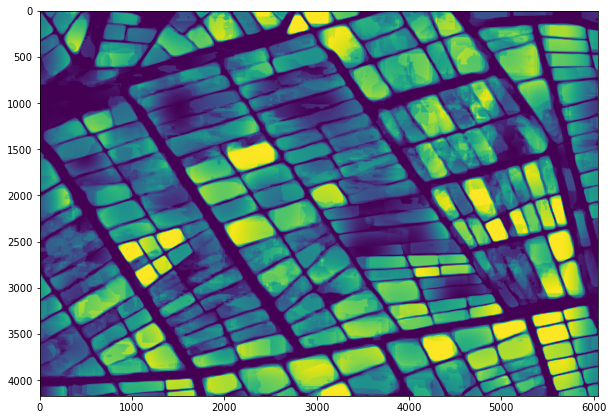

In [2]:
import solaris as sol
import os
import skimage
import matplotlib.pyplot as plt

import rasterio
ref_image = rasterio.open(r"E:\PlotDel_Steven\Data\subimages\tile_8.tif")
#mask_image_rst = rasterio.open(r"E:\PlotDel_Steven\Data\subimages_geo_ref_pred1.tif")

mask_image = skimage.io.imread(r"E:\PlotDel_Steven\Data\Test\geo_referenced\tile_0.tif")

geoms = sol.vector.mask.mask_to_poly_geojson(mask_image, channel_scaling=[1, -1, -1])

f, ax = plt.subplots(figsize=(10, 8))
plt.imshow(mask_image)

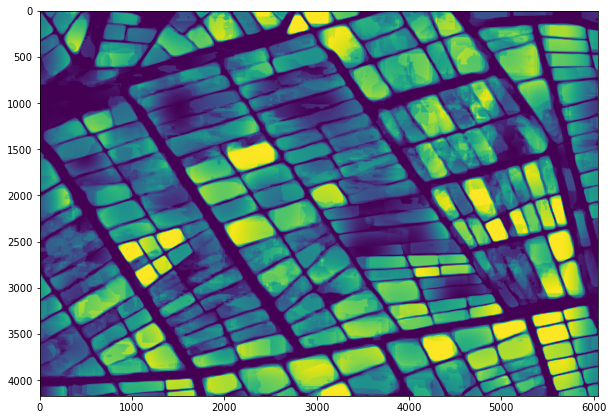

In [13]:
ref_image = rasterio.open(r"E:\PlotDel_Steven\Data\subimages\tile_8.tif")

mask_image = skimage.io.imread(r"E:\PlotDel_Steven\Data\Test\geo_referenced\tile_0.tif")

geoms = sol.vector.mask.mask_to_poly_geojson(mask_image)

f, ax = plt.subplots(figsize=(10, 8))
plt.imshow(mask_image)

In [14]:
import geopandas as gpd
from shapely.ops import unary_union

result_polys = sol.vector.polygon.georegister_px_df(geoms, 
                                                   affine_obj=ref_image.transform, 
                                                   crs=ref_image.crs
                                                   )
#unary_union(result_polys['geometry'])

In [15]:
result_polys

,geometry,value
0,"POLYGON ((-16.23669 16.50681, -16.23669 16.506...",255.0
1,"POLYGON ((-16.22517 16.50679, -16.22517 16.506...",255.0
2,"POLYGON ((-16.22414 16.50668, -16.22414 16.506...",255.0
3,"POLYGON ((-16.22422 16.50668, -16.22422 16.506...",255.0
4,"POLYGON ((-16.22422 16.50667, -16.22422 16.506...",255.0
...,...,...
108,"POLYGON ((-16.23306 16.49638, -16.23307 16.496...",255.0
109,"POLYGON ((-16.23652 16.49581, -16.23652 16.495...",255.0
110,"POLYGON ((-16.23410 16.49627, -16.23411 16.496...",255.0
111,"POLYGON ((-16.22882 16.49731, -16.22883 16.497...",255.0


In [88]:
#result_polys

In [18]:

result_polys.to_file('result_polys4.geojson', driver='GeoJSON')

result_polys.to_file("result_polys4.shp")


In [19]:
os.getcwd()

'E:\\PlotDel_Steven\\sen_proj\\notebooks'

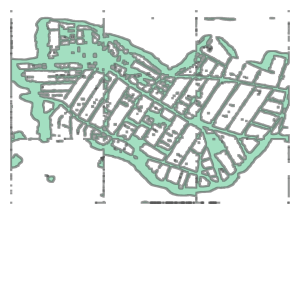

In [89]:
geoms = sol.vector.mask.mask_to_poly_geojson(mask_image,reference_im = ref_image,min_area = 100,channel_scaling=[1,0,-1], 
                                                 #bg_threshold=245, 
                                                 simplify=True,
                                                 tolerance=2)
#geoms = 50
unary_union(geoms['geometry'])

In [90]:
ref_image.crs

CRS.from_epsg(4326)

In [36]:
import rasterio
import rasterio.features
import rasterio.warp

'''
#with rasterio.open('example.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)
        '''

"\n#with rasterio.open('example.tif') as dataset:\n\n    # Read the dataset's valid data mask as a ndarray.\n    mask = dataset.dataset_mask()\n\n    # Extract feature shapes and values from the array.\n    for geom, val in rasterio.features.shapes(\n            mask, transform=dataset.transform):\n\n        # Transform shapes from the dataset's own coordinate\n        # reference system to CRS84 (EPSG:4326).\n        geom = rasterio.warp.transform_geom(\n            dataset.crs, 'EPSG:4326', geom, precision=6)\n\n        # Print GeoJSON shapes to stdout.\n        print(geom)\n        "

In [33]:


def explode(gdf):
    """    
    Will explode the geodataframe's muti-part geometries into single 
    geometries. Each row containing a multi-part geometry will be split into
    multiple rows with single geometries, thereby increasing the vertical size
    of the geodataframe. The index of the input geodataframe is no longer
    unique and is replaced with a multi-index. 

    The output geodataframe has an index based on two columns (multi-index) 
    i.e. 'level_0' (index of input geodataframe) and 'level_1' which is a new
    zero-based index for each single part geometry per multi-part geometry
    
    Args:
        gdf (gpd.GeoDataFrame) : input geodataframe with multi-geometries
        
    Returns:
        gdf (gpd.GeoDataFrame) : exploded geodataframe with each single 
                                 geometry as a separate entry in the 
                                 geodataframe. The GeoDataFrame has a multi-
                                 index set to columns level_0 and level_1
        
    """
    gs = gdf.explode()
    gdf2 = gs.reset_index().rename(columns={0: 'geometry'})
    gdf_out = gdf2.merge(gdf.drop('geometry', axis=1), left_on='level_0', right_index=True)
    gdf_out = gdf_out.set_index(['level_0', 'level_1']).set_geometry('geometry')
    gdf_out.crs = gdf.crs
    return gdf_out

def cleanup_invalid_geoms(all_polys):
      all_polys_merged = gpd.GeoDataFrame()
      all_polys_merged['geometry'] = gpd.GeoSeries(cascaded_union([p.buffer(0) for p in all_polys]))
      gdf_out = explode(all_polys_merged)
      gdf_out = gdf_out.reset_index()
      gdf_out.drop(columns=['level_0','level_1'], inplace=True)
      all_polys = gdf_out['geometry']
      return all_polys

all_polys = cleanup_invalid_geoms(geoms)

AttributeError: 'str' object has no attribute 'buffer'